# <a id='toc1_'></a>[El Mejor Juego](#toc0_)

## <a id='toc1_1_'></a>[Contexto](#toc0_)

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. 

## <a id='toc0_'></a>[Tabla de Contenidos](#toc0_) 

- [El Mejor Juego](#toc1_)    
  - [Contexto](#toc1_1_)    
  - [Tabla de Contenidos](#toc0_)    
  - [Introducción](#toc1_3_)    
  - [Paso 1: Exploración del Dataset:](#toc1_4_)    
  - [Paso 2: Preparación de los datos](#toc1_5_)    
    - [Cambio de nombre de las columnas: Cambiar Mayúsculas por Minúsculas](#toc1_5_1_)    
    - [Gestión de duplicados](#toc1_5_2_)    
      - [Primer caso](#toc1_5_2_1_)    
      - [Segundo caso](#toc1_5_2_2_)    
      - [Solución de duplicados](#toc1_5_2_3_)    
    - [Gestión de datos ausentes y tipos de datos](#toc1_5_3_)    
      - [Caso "year_of_release"](#toc1_5_3_1_)    
      - [Caso "critic_score"](#toc1_5_3_2_)    
      - [Caso "user_score"](#toc1_5_3_3_)    
      - [Caso "rating"](#toc1_5_3_4_)    
  - [Paso 3: Análisis de Datos:](#toc1_6_)    
  - [Paso 4: Perfil de usuario para cada región](#toc1_7_)    
  - [Paso 5: Prueba de hipótesis](#toc1_8_)    
    - [Primera Hipótesis](#toc1_8_1_)    
    - [Segunda Hipótesis](#toc1_8_2_)    
  - [Paso 6: Conclusiones generales](#toc1_9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_3_'></a>[Introducción](#toc0_)

Se solicito un análisis para identificar patrones que determinen si un juego tiene éxito o no con la finalidad de detectar proyectos prometedores y planificar futuras campañas publicitarias para el año 2017.

Para el desarrollo de este proyecto se plantearan seis pasos:

* Paso 1: Exploración general de los datos.

* Paso 2: Preparación de los datos para el análisis. 

* Paso 3: Análisis de los datos.

* Paso 4: Creación de perfiles de usuarios para cada región.

* Paso 5: Prueba de hipótesis.

* Paso 6: Conclusiones generales. 

En cada se explicara a mas detalle el proceso a llevar a cabo. Explicado esto, procedemos al desarrollo del análisis. 

___

## <a id='toc1_4_'></a>[Paso 1: Exploración del Dataset:](#toc0_)

En este apartado cargaremos la información, revisaremos como se compone y plantearemos una estrategia para realizar el análisis. 

Para empezar cargaremos todas las librerías necesarias para realizar el proyecto. 

In [1]:
# Cargando librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
from math import factorial

A continuación cargamos el archivo con la información:

In [2]:
# Cargar el Dataset
df_games = pd.read_csv('./datasets/games.csv')


Una vez cargado pasaremos a la revisión de su contenido, clasificación y detección de errores.

In [3]:
# Información general:
print(df_games.info())
# Muestra de la información:
df_games.sample(5, random_state=1133)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
729,Monster Hunter Tri,Wii,2009.0,Role-Playing,0.65,0.40,1.05,0.11,84.0,8.6,T
899,Red Faction,PS2,2001.0,Shooter,0.76,0.96,0.00,0.20,88.0,8,M
2253,Knockout Kings 2000,N64,1999.0,Fighting,0.63,0.27,0.00,0.02,NaN,NaN,NaN
761,Scribblenauts,DS,2009.0,Puzzle,1.67,0.30,0.02,0.18,79.0,7.6,E10+
5308,College Hoops 2K8,PS2,2007.0,Sports,0.17,0.13,0.00,0.04,66.0,tbd,E


Revisando los datos, podemos describir el contenido de las columnas como lo siguiente: 

* Name -> Nombre del juego
* Platform -> Plataforma del juego
* Year_of_Release -> Año de lanzamiento
* Genre -> Genero del juego
* NA_sales -> Ventas en Norteamérica en millones de dólares estadounidenses
* EU_sales ->  Ventas en Europa en millones de dólares estadounidenses
* JP_sales -> Ventas en Japón en millones de dólares estadounidenses
* Other_sales -> Ventas en otros países en millones de dólares estadounidenses
* Critic_Score -> Calificación de criticas por profesionales (máximo 100)
* User_Score -> Calificación de criticas por usuarios (máximo 10)
* Rating -> Clasificación de cada juego (Entertainment Software Rating Board)

Adicional a esto notamos ciertos detalles en la información:

* Los nombres de las columnas hace uso de mayúsculas.
* El tipo de datos de la columna `Year_of_Release` debería de ser de tipo entero (int)
* Las siguientes columnas cuentan con datos ausentes:
    * Name
    * Year_of_Release
    * Genre
    * Critic_Score
    * User_Score
    * Rating

Mas adelante abordaremos como lideraremos con el problema de los valores ausentes.
___

## <a id='toc1_5_'></a>[Paso 2: Preparación de los datos](#toc0_)

Como pudimos ver en el primer paso, se detectaron los siguientes problemas:

* Problemas con los nombres de columnas
* Problemas de tipos de datos de columnas 
* Valores ausentes

Adicional a estos problemas, corroboraremos valores duplicados. 



### <a id='toc1_5_1_'></a>[Cambio de nombre de las columnas: Cambiar Mayúsculas por Minúsculas](#toc0_)
Primeramente atenderemos el problema de los nombres de las columnas.

Como se aclaraba en el primer paso; Los nombres de las columnas del DataFrame hacen uso de mayúsculas, lo cual pudiera representar un problema al momento de buscar información dentro del DataFrame. Para solucionar este problema, cambiaremos los caracteres en mayúsculas a minúsculas.

In [4]:
# Cambiar de Mayúsculas a Minúsculas

# Declaramos una lista que nos ayudara a almacenar los nombres nuevos de las columnas
new_col_names = []

for old_name in df_games.columns:
    # Eliminamos espacios al principio y al final (Solo por precaución)
    name_stripped = old_name.strip()
    # Ponemos todas las letras en minúsculas:
    name_lowered = name_stripped.lower()
    # Agregamos el nuevo nombre a la lista de nuevos nombres de columna
    new_col_names.append(name_lowered)
    
# Remplazamos los nombres anteriores por los nuevos
df_games.columns = new_col_names

# Mostramos los nuevos nombres de columnas
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Una vez que cambiamos los nombres de las columnas a minúsculas, podemos proceder a ver duplicados.



### <a id='toc1_5_2_'></a>[Gestión de duplicados](#toc0_)

Para revisar elementos duplicados, seleccionaremos las columnas `name`, `platform` y `year_of_release`, pues podemos concluir que solo existe un juego para cada plataforma y año de lanzamiento, es decir, el juego "Assassins Creed" se repetirá varias veces en la columna `name` las cuales corresponden a las plataformas "PC", "PS2", "Wii", etc. y pudieran haber distintas versiones del juego en distintos años de lanzamiento por plataforma. Lo que buscamos es que no se repita el juego por plataforma y año de lanzamiento.

In [5]:
# Búsqueda de duplicados en las columnas "name", "platform" y "year_of_release"
print(df_games[df_games[['name','platform', 'year_of_release']].duplicated()])

                name platform  year_of_release   genre  na_sales  eu_sales  \
14244            NaN      GEN           1993.0     NaN       0.0      0.00   
16230  Madden NFL 13      PS3           2012.0  Sports       0.0      0.01   

       jp_sales  other_sales  critic_score user_score rating  
14244      0.03          0.0           NaN        NaN    NaN  
16230      0.00          0.0          83.0        5.5      E  


Notemos que solo tenemos dos duplicados, antes de tomar una decisión veamos cada caso y revisemos que información tiene el duplicado que pudiera complementar a la fila original.

#### <a id='toc1_5_2_1_'></a>[Primer caso](#toc0_)

Para este primer caso, buscaremos las filas en las que el nombre del juego sea nulo.

In [6]:
# Buscar filas con nombres nulos
print(df_games[df_games['name'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


Podemos notar que particularmente en este juego, hay mucha información que esta ausente, al no aportar mucha información a la investigación podemos eliminar las filas sin problemas. Adicional a esto podemos corroborar que estas dos filas corresponden también a los dos valores ausentes de la columna "genre" por lo que ya no tendremos que trabajar mas adelante para solucionar los problemas de valores ausentes de las columnas "name" y "genre".

In [7]:
# Desechamos las filas con valores ausentes
df_games = df_games.dropna(subset='name')

# Corroboramos la modificación
print(df_games[df_games['name'].isna()])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


#### <a id='toc1_5_2_2_'></a>[Segundo caso](#toc0_)

Para este caso buscaremos todas las coincidencias con el el juego "Madden NFL 13" particularmente de la plataforma "PS3".

In [8]:
# Buscando filas con nombres "Madden NFL 13" con plataforma "PS3"
print(df_games[(df_games['name'] == 'Madden NFL 13') & (df_games['platform'] == 'PS3')])

                name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3           2012.0  Sports      2.11      0.22   
16230  Madden NFL 13      PS3           2012.0  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score user_score rating  
604         0.0         0.23          83.0        5.5      E  
16230       0.0         0.00          83.0        5.5      E  


Podemos notar que, evidentemente, ambas filas son idénticas sin embargo la información que tenemos que complementar a la fila original vendría siendo en la columna `eu_sales`, por lo que se sumaran las ventas y se unificaran ambas filas.  

#### <a id='toc1_5_2_3_'></a>[Solución de duplicados](#toc0_)

Como ya hemos aclarado, para resolver el problema de duplicados se sumaran particularmente las ventas de cada juego para unificar las filas duplicadas.

In [9]:
# Sumamos las ventas de Europa del Segundo caso
madden_eu_sales = df_games[(df_games['name'] == 'Madden NFL 13') & (df_games['platform'] == 'PS3')]['eu_sales'].sum()
print('Las ventas totales del juego Madden NFL 13 es: ', madden_eu_sales)


Las ventas totales del juego Madden NFL 13 es:  0.23


Una vez calculados los valores del as ventas respectivamente de cada caso vamos a actualizar la información de las ventas en las filas originales.

In [10]:
# Actualizamos las ventad de Europa en la fila original del Segundo caso
df_games.loc[604, 'eu_sales'] = madden_eu_sales

# Corroboramos la actualización de datos
print(df_games[df_games['name'].isna()])
print()
print(df_games[(df_games['name'] == 'Madden NFL 13') & (df_games['platform'] == 'PS3')])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

                name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3           2012.0  Sports      2.11      0.23   
16230  Madden NFL 13      PS3           2012.0  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score user_score rating  
604         0.0         0.23          83.0        5.5      E  
16230       0.0         0.00          83.0        5.5      E  


Una vez corroborado que los datos estén actualizados podemos desechar los duplicados.

In [11]:
# Desechando duplicados
df_games = df_games.drop_duplicates(subset=['name','platform','year_of_release']).reset_index(drop=True)

# Corroboramos el resultado
print(df_games[df_games[['name', 'platform', 'year_of_release']].duplicated()])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


Una vez solucionado el problema de los valores ausentes, podemos continuar con el problema datos ausentes. 

### <a id='toc1_5_3_'></a>[Gestión de datos ausentes y tipos de datos](#toc0_)

Como vimos en la primera sección, encontramos algunas columnas que tienen datos ausentes. Esas columnas son: 
* `name` -> Ya eliminados en la sección anterior
* `year_of_release`
* `genre` -> Ya eliminados en la sección anterior
* `critic_score`
* `user_score`
* `rating`

Adicional a esto podemos ver que algunos tipos de datos no coinciden con el tipo de dato de su columna, como lo son los casos: 
* `year_of_release`
* `critic_score`
* `user_score`

Conforme vayamos corrigiendo los datos nulos, también cambiaremos los tipos de datos de las columnas con este problema. 

#### <a id='toc1_5_3_1_'></a>[Caso "year_of_release"](#toc0_)

Primeramente veremos la cantidad de valores ausentes que tenemos en la columna.

In [12]:
# Imprimimos los valores ausentes de la columna "year_of_release"
print(df_games[df_games['year_of_release'].isna()])

                                    name platform  year_of_release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16370  PDC World Championship Darts 2008      PSP              NaN   
16402                      Freaky Flyers       GC              NaN   
16445                          Inversion       PC              NaN   
16455        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16519                       Virtua Quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   

Para poder solucionar este problema en particular, propondremos obtener los años de lanzamientos correspondientes a los mismos títulos pero de diferentes plataformas para poder complementar esta información. 

Primeramente obtendremos una lista de títulos multiplataforma.

In [13]:
# Obteniendo una lista de juegos multiplataforma
games = df_games.groupby('name')['platform'].count().reset_index()

games

,name,platform
0,Beyblade Burst,1
1,Fire Emblem Fates,1
2,Frozen: Olaf's Quest,2
3,Haikyu!! Cross Team Match!,1
4,Tales of Xillia 2,1
...,...,...
11554,thinkSMART: Chess for Kids,1
11555,uDraw Studio,1
11556,uDraw Studio: Instant Artist,2
11557,wwe Smackdown vs. Raw 2006,1


In [14]:
# Filtramos por juegos que tengan mas de una plataforma
videogames = games[games['platform']>1]

# Extraemos solo los nombres
mp_games = videogames.name.unique()

# Mostramos los nombres
mp_games


array([" Frozen: Olaf's Quest", '007: Quantum of Solace',
       '007: The World is not Enough', ..., "nail'd",
       'pro evolution soccer 2011', 'uDraw Studio: Instant Artist'],
      dtype=object)

In [15]:
# Declaramos el ciclo for para recorrer los títulos cuyos nombres estén en la lista de mp_games
for gm in mp_games:
    game = df_games[df_games['name'] == gm]
    # Calculamos la moda de los años de lanzamiento que tenga este titulo en sus distintas plataformas
    year_mode = game['year_of_release'].mode()
    # creamos una lista de los indices donde aparezca el mismo titulo
    game_in = game.index.values
    
    # En otro ciclo 'for' recorreremos los indices para rellenar las posibles casillas nulas de la columna "year_of_release" de los títulos que se encuentren en la lista "mp_games"
    for id in game_in:
        # En este filtro 'if' corroboramos que la casilla de la columna "year_of_release" este vacía y que la variable que contiene el valor de la moda no este vació
        if pd.isna(df_games.iloc[id, df_games.columns.get_loc('year_of_release')]) and (year_mode.empty != True ) :
            df_games.iloc[id, df_games.columns.get_loc('year_of_release')] = year_mode[0]
    
print('Done')

Done


El algoritmo anterior recorreré todos los títulos multiplataforma, calculara la moda de los años de lanzamiento e ingresará este valor en las casillas nulas correspondientes a cada titulo. Terminado este proceso corroboraremos la cantidad de datos nulos que tenemos después de este proceso.

In [16]:
# Corroborando la cantidad de nulos de la columna "year_of_release"
df_games.info()

# Mostramos las filas que contienen datos nulos en la columna "year_of_release"
print(df_games[df_games['year_of_release'].isna()])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16566 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
                                           name platform  year_of_release  \
475                  wwe Smackdown vs. Raw 2006      PS2              NaN   
627                                   Rock Band     X360              NaN   
657    Fro

Como podemos ver, solo queda una cantidad de 146 datos nulos. Pero como podemos ver en algunos títulos podemos apreciar que viene incluido el año de lanzamiento en sus últimos 4 caracteres, por lo que plantearemos otro algoritmo que revise los últimos 4 caracteres del titulo de cada juego que contenga valores nulos en la columna `year_of_release` y lo complementaremos en esa misma columna. 

Un dato importante a considerar, todos los juegos deportivos incluyen el año de la temporada a que corresponde ese titulo, sin embargo el juego es lanzado varios meses antes del año que indica su titulo por lo que al año obtenido de su nombre se le restara 1 para que coincida con el de su año de lanzamiento original. 

In [17]:
# Obtenemos una lista de los títulos cuyo valor en la columna "year_of_release" sea nula
filter_games_with_no_year = df_games[df_games['year_of_release'].isna()]
games_with_no_year = filter_games_with_no_year.name.unique()

games_with_no_year

array(['wwe Smackdown vs. Raw 2006', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog", 'Triple Play 99',
       'Adventure', 'Combat', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Yakuza 4', 'WarioWare: Twisted!', 'Test Drive Unlimited 2',
       'Monster Hunter 2', 'Advance Wars: Days of Ruin', 'Fishing Derby',
       'Karate', 'Circus Atari',
       'The Chronicles of Riddick: Escape from Butcher Bay',
       "Maze Craze: A Game of Cops 'n Robbers", 'Silent Hill: Homecoming',
       'Super Breakout', "Robert Ludlum's The Bourne Conspiracy",
       'NHL Slapshot', 'TERA', 'NFL GameDay 2003',
       'Harvest Moon: Save the Homeland', 'Hangman',
       "Cubix Robots for Everyone: Clash 'n' Bash",
       'Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)', 'Dragster',
       'All-Star Baseball 2005', 'Slot Machine',
       'The Dukes of Hazzard II: Daisy Dukes It Out',
       'Haven: Call of the King',
       'Unreal Ch

In [18]:
# Creamos el ciclo for que recorra toda la lista buscando títulos que en sus últimos 4 caracteres tenga el año de lanzamiento del juego
for gm in games_with_no_year:
    # apartamos los últimos 4 caracteres del titulo
    last_four = gm[-4:]
    # Comprobamos si los últimos 4 caracteres son dígitos
    if last_four.isdigit():
        # Convertimos los últimos cuatro caracteres en un numero flotante (el tipo de dato de la columna es flotante)
        year = float(last_four) - 1
        # Buscamos la coincidencia del titulo en el DataFrame
        game = df_games[df_games['name'] == gm]
        # Obtenemos el indices de la filas coincidentes
        game_in = game.index.values
        
        # Creamos un ciclo 'for' para recorrer los indices para rellenar las casillas nulas de la columna "year_of_release"
        for id in game_in:
            # Corroboramos si la casilla del titulo es nula
            if pd.isna(df_games.iloc[id, df_games.columns.get_loc('year_of_release')]):
                df_games.iloc[id, df_games.columns.get_loc('year_of_release')] = year
        
print('Done')

Done


Una vez realizados estos cambios volvemos a corroborar los datos ausentes de la columna `year_of_release`.

In [19]:
# Corroborando la cantidad de nulos de la columna "year_of_release"
df_games.info()

# Mostramos las filas que contienen datos nulos en la columna "year_of_release"
print(df_games[df_games['year_of_release'].isna()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16573 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
                                           name platform  year_of_release  \
627                                   Rock Band     X360              NaN   
657    Frogger's Adventures: Temple of the Frog      GBA              NaN   
804       

Como podemos ver solo queda complementar la información de 139 filas de la columna `year_of_release`. Esta información no representa un gran impacto (0.8% del DataSet) por lo que pudiéramos disponer de ella sin riesgo alguno. 

In [20]:
# Desechando las filas con valores nulos
df_games = df_games.dropna(subset='year_of_release')

# Corroborando que ya no hayan valores nulos en la columna "year_of_release"
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16573 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16573 non-null  object 
 1   platform         16573 non-null  object 
 2   year_of_release  16573 non-null  float64
 3   genre            16573 non-null  object 
 4   na_sales         16573 non-null  float64
 5   eu_sales         16573 non-null  float64
 6   jp_sales         16573 non-null  float64
 7   other_sales      16573 non-null  float64
 8   critic_score     8078 non-null   float64
 9   user_score       9937 non-null   object 
 10  rating           9870 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Corroborando que no hay valores nulos en la columna "year_of_release" podemos avanzar a la siguiente columna.

A continuación cambiaremos el tipo de dato de esta columna a tipo entero para facilitar los análisis mas adelante. 

Nota: No se cambio el tipo de dato de esta columna a `datetime` pues la columna no cuenta con información adicional sobre la fecha de lanzamiento por lo que se opto por darle un tipo de dato entero a la columna `year_of_release`.

In [21]:
# Corroborando que sea seguro cambiar de tipo de datos la columna "year_of_release" a tipo entero
np.array_equal(df_games['year_of_release'], df_games['year_of_release'].astype('int'))

True

Corroborando que es seguro cambiar de tipo de dato a entero procedemos a hacer el procedimiento.

In [22]:
# Cambio de tipo de dato a entero de la columna "year_of_release"
df_games['year_of_release'] = df_games['year_of_release'].astype('int')

# Corroboramos el cambio de tipo de dato
print(df_games['year_of_release'].dtypes)

int32


#### <a id='toc1_5_3_2_'></a>[Caso "critic_score"](#toc0_)

Como podemos ver anteriormente, esta columna presenta un problema muy importante, pues los valores ausentes de esta columna es mas del 50% del contenido del DataSet (8576 datos nulos). Por lo que no se podrá complementar la información de una forma en la cual se tenga certeza de los datos.

#### <a id='toc1_5_3_3_'></a>[Caso "user_score"](#toc0_)

Al igual que en el caso de "critic_score", los datos nulos superan el 50% de los datos obtenidos en el DataSet por lo se optará por dejar asi la información. Adicional a esto notaremos que hay filas con el valor "tbd" (To Be Determined -> Por Ser Determinado) lo cual nos quiere decir que aun no se ha determinado una critica por el usuario, esta información sera remplazada como valores nulos y cambiaremos el tipo de dato a flotante.

In [23]:
# Cambiando los valores "tbd" a tipo nulo
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)

# Cambiando de tipo de dato la columna "user_score" a tipo flotante
df_games['user_score'] = pd.to_numeric(df_games['user_score'])

# Corroborando el cambio de tipo de la columna "user_score"
print(df_games['user_score'].dtypes)

float64


#### <a id='toc1_5_3_4_'></a>[Caso "rating"](#toc0_)

Para este caso, como en los demás primeramente veremos primeramente los valores únicos que tiene la columna y los valores nulos.

In [24]:
# Revisando los valores únicos de la la columna "rating"
print(df_games['rating'].value_counts())


rating
E       3960
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: count, dtype: int64


Como podemos ver, los títulos dentro de este DataSet, tienen una mayor inclinación a que sean juegos de tipo "E" sin embargo considerando que los datos nulos de esta columna representa aproximadamente el 40% (6764 filas con datos nulos), no podríamos definir un criterio para establecer un tipo de clasificación por juego certero, por lo que estos datos los marcaremos como "Unknown". 

In [25]:
# Rellenando los espacios vacíos por la palabra "Unknown"
df_games['rating'] = df_games['rating'].fillna('Unknown')

# Corroborando que ya no hay datos nulos en la columna
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16573 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16573 non-null  object 
 1   platform         16573 non-null  object 
 2   year_of_release  16573 non-null  int32  
 3   genre            16573 non-null  object 
 4   na_sales         16573 non-null  float64
 5   eu_sales         16573 non-null  float64
 6   jp_sales         16573 non-null  float64
 7   other_sales      16573 non-null  float64
 8   critic_score     8078 non-null   float64
 9   user_score       7542 non-null   float64
 10  rating           16573 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


Corroborando que todos los problemas con los datos esta resuelto podemos proceder con el análisis de datos.
___


## <a id='toc1_6_'></a>[Paso 3: Análisis de Datos:](#toc0_)

Una vez preparados los datos podemos proceder al análisis, para ello se plantearon los siguientes puntos a resolver: 

* Cuantos juegos fueron lanzados en diferentes años.
* El comportamiento de las ventas de videojuegos en distintas plataformas.
* Identificar las plataformas lideres en ventas
* Revisión de como de las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular. 
* Distribución general de los juegos por género.

Aclarado esto empezaremos analizando la cantidad de juegos lanzados en diferentes años.

In [26]:
# Agrupando la información
yearly_games = df_games.groupby('year_of_release')['name'].count().sort_index().reset_index()

# Mostramos una tabla con los resultados
display(yearly_games.head(10))

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


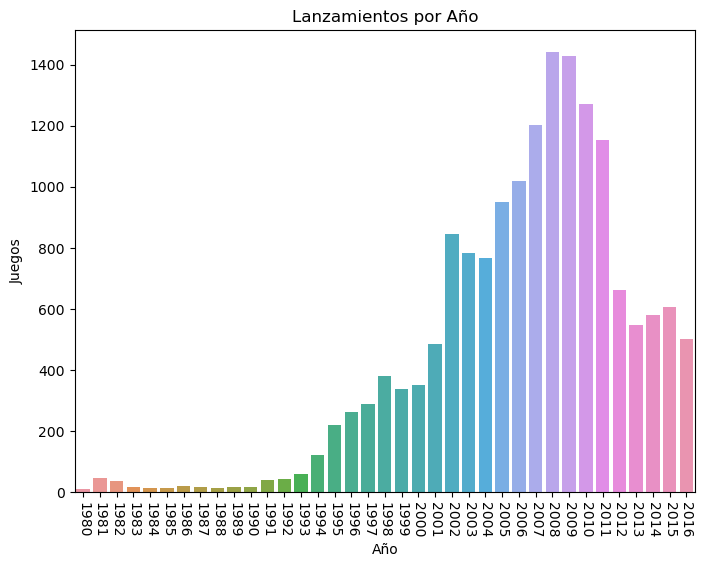

In [27]:
# Mostramos los resultados en una gráfica de barras
plt.figure(figsize=(8,6))
sns.barplot(x = 'year_of_release' , y='name', data=yearly_games)
plt.title('Lanzamientos por Año')
plt.xlabel('Año')
plt.ylabel('Juegos')
plt.xticks(rotation = 270)

plt.show()

Como podemos ver en los resultados, notamos que los años que tuvieron mas lanzamientos fueron los años 2007 con 1466 lanzamientos, seguido del año 2008 con 1427 casi a la par del 2009 con tan solo un lanzamiento de diferencia (1426). Adicional a esto podemos notar en la gráfica que a partir del año 2000 el lanzamiento de juegos al año aumento y aparir del 2009 empezó a disminuir encontrando un constante variación entre 600 - 700 juegos al año desde el 2012 hacia adelante. 

Continuamos con la variación de ventas por plataforma. Para ello complementaremos la información que tenemos haciendo una columna sumando todas las ventas recabadas.

In [28]:
# Creamos una columna nueva llamada "total_sales" donde sumaremos las ventas totales por titulo.
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

# Agrupamos los datos con respecto a plataformas
platform_sales = df_games.groupby('platform')[['na_sales','eu_sales','jp_sales','other_sales','total_sales']] \
    .sum().sort_values(by='total_sales', ascending=False).reset_index()

# Mostramos el resultado
display(platform_sales.head(10))

,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,PS2,582.02,338.34,137.78,192.78,1250.92
1,X360,599.15,269.84,12.33,85.35,966.67
2,PS3,391.60,328.97,79.52,135.10,935.19
3,Wii,494.01,261.48,69.05,78.77,903.31
4,DS,381.38,188.72,175.02,59.16,804.28
5,PS,334.72,212.39,139.78,40.69,727.58
6,PS4,108.74,141.09,15.96,48.35,314.14
7,GBA,184.73,74.82,46.56,7.62,313.73
8,PSP,109.09,66.68,76.38,41.42,293.57
9,PC,94.23,142.16,0.17,22.30,258.86


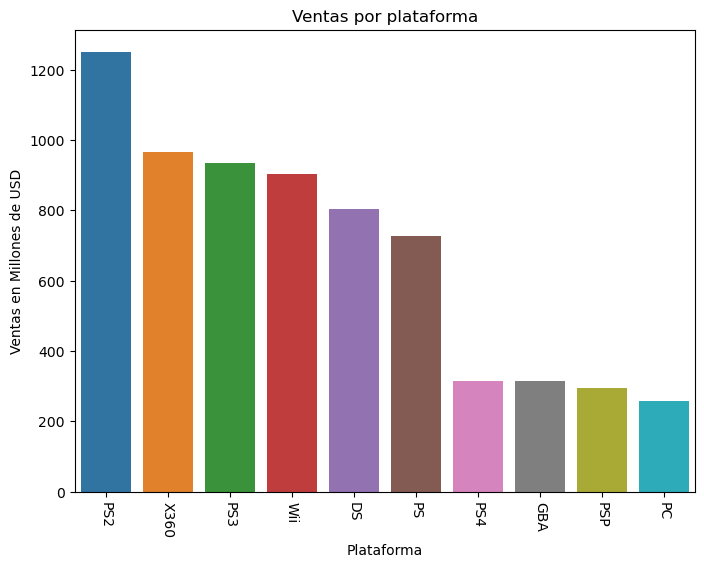

In [29]:
# Creamos una gráfica con el top 10 plataformas con mayores ventas totales.
plt.figure(figsize=(8,6))
sns.barplot(data = platform_sales[['platform', 'total_sales']].head(10), x='platform', y='total_sales')
plt.title('Ventas por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en Millones de USD')
plt.xticks(rotation = 270)

plt.show()

Como podemos ver la plataforma con mas ventas en el DataSet es PS2 o por sus siglas "Play Station 2". Ahora veamos el comportamiento de las ventas por plataforma a lo largo de los años, para ello escogeremos las plataformas PS2, X360, PS3, Wii y DS.

In [30]:
# Hacemos una lista con las plataformas a analizar
platforms = platform_sales['platform'].head(5)

# Filtramos de acuerdo a la lista "platforms"
year_platform_sales_filter = df_games[df_games['platform'].isin(platforms)]

# Agrupamos por año y ventas
year_platform_sales = year_platform_sales_filter.groupby(['year_of_release', 'platform'])['total_sales'] \
    .sum().sort_index().reset_index()

# Mostramos el resultado
display(year_platform_sales)


,year_of_release,platform,total_sales
0,1985,DS,0.02
1,2000,PS2,39.17
2,2001,PS2,166.43
3,2002,PS2,208.76
4,2003,PS2,193.05
5,2004,DS,17.27
6,2004,PS2,212.13
7,2005,DS,130.14
8,2005,PS2,163.95
9,2005,PS3,0.19


Al revisar un poco mas sobre la información notamos un titulo cuyo año de lanzamiento es 1985 lo cual no pareciera ser del todo correcto, investigaremos un poco mas sobre ese caso en particular para corroborar si necesita alguna corrección. 

In [31]:
# Revisando el titulo con la anomalía
display(df_games[(df_games['platform'] == 'DS') & (df_games['year_of_release'] == 1985)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15955,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,Unknown,0.02


Buscando a profundidad sobre este titulo, encontramos que el año de lanzamiento para la plataforma "DS" fue el 2010, por lo que corregiremos esta información.

In [32]:
# Corrección de información del titulo "Strongest Tokyo University Shogi DS"
df_games.loc[15955, 'year_of_release'] = 2010

# Corroboramos la corrección
display(df_games[df_games['name'] == 'Strongest Tokyo University Shogi DS'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15955,Strongest Tokyo University Shogi DS,DS,2010,Action,0.0,0.0,0.02,0.0,NaN,NaN,Unknown,0.02


Una vez corregida la información podemos graficar la información obtenida. 

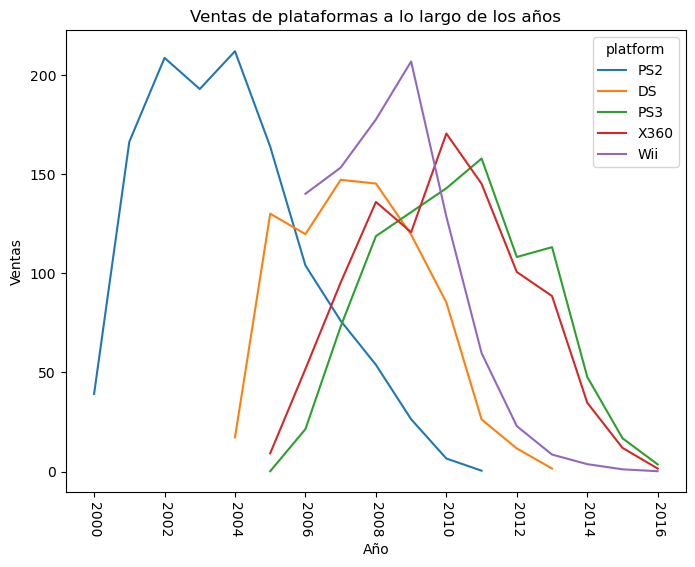

In [33]:
# Filtramos de acuerdo a la lista "platforms"
year_platform_sales_filter = df_games[df_games['platform'].isin(platforms)]

# Agrupamos por año y ventas
year_platform_sales = year_platform_sales_filter.groupby(['year_of_release', 'platform'])['total_sales'] \
    .sum().sort_index().reset_index()

# Graficamos
plt.figure(figsize=(8,6))
sns.lineplot(data = year_platform_sales, x='year_of_release', y='total_sales', hue='platform')
plt.title('Ventas de plataformas a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(rotation = 270)

plt.show()

De acuerdo a la investigación se llegaron a las siguientes conclusiones:

* DS genero ventas a partir del año 2004 las ventas de los títulos para esa plataforma aumentaron llegando hasta los 150 millones dólares estadounidenses en el año de 2007, a partir de ahi las ventas bajaron dando a la plataforma un periodo de vida de aproximadamente 10 años (2004-2013). 

* PS2 genero ventas a partir del año 2000 obteniendo hasta 211 millones de dólares estadounidenses en el año 2004, a partir de ahi las ventas disminuyeron dando a la plataforma una vida de aproximadamente 12 años (2000-2011).

* PS3 genero ventas a partir del año 2006 obteniendo una cifra maxima de 156 millones de dólares estadounidenses en el año 2011, empezando a disminuir hasta el año 2016 el cual es el limite de tiempo de nuestro DataSet por lo que no podríamos confirmar que sea el ultimo año que genere ingresos (aunque asi pareciera su tendencia).

* Wii genero ventas desde el año 2006 generando un máximo de 206 millones de dólares estadounidenses, a continuación reducen sus ventas hasta llegar al año 2016. Igual que en el caso de la plataforma PS3, no podríamos confirmar que se el ultimo año que genere ingresos, sin embargo su tendencia muestra que el 2016 pudiera ser su ultimo año. 

* X360 genero ventas desde el año 2005 obteniendo un total de 170 millones de dólares, en los próximos años sus ventas disminuyeron hasta llegar al año 2016. 

Como podemos ver en el caso de la plataforma DS y PS2, el periodo de vida que tienen rondan los 10 años. Sin embargo tomaremos otra muestra de plataformas para comparar este comportamiento y corroborar esta hipótesis. Adicional a esto seleccionaremos consolas que sean competitivas entre si mismas y que sean consecutivas, es decir, seleccionaremos GBA (Game Boy Advance) y DS (Nintendo DS) pues ambas consolas son portátiles y son consecutivas una de otra, primero salio al mercado GBA y enseguida DS. Bajo ese concepto seleccionaremos las siguientes consolas: 

* GBA
* DS
* SNES
* N64
* PS
* PS2

In [34]:
# Crearemos una lista con las plataformas seleccionadas
old_platforms = ['GBA', 'DS', 'SNES', 'PS', 'PS2']

# Teniendo la lista procedemos a filtrar el DataFrame
old_platform_sales_filter = df_games[df_games['platform'].isin(old_platforms)]

# Agrupamos por año y ventas
old_platform_sales = old_platform_sales_filter.groupby(['year_of_release', 'platform'])['total_sales'] \
    .sum().sort_index().reset_index()
    
# Mostramos el resultado
display(old_platform_sales)

,year_of_release,platform,total_sales
0,1990,SNES,26.15
1,1991,SNES,16.22
2,1992,SNES,32.98
3,1993,SNES,40.02
4,1994,PS,6.03
5,1994,SNES,35.08
6,1995,PS,35.96
7,1995,SNES,32.20
8,1996,PS,94.70
9,1996,SNES,15.92


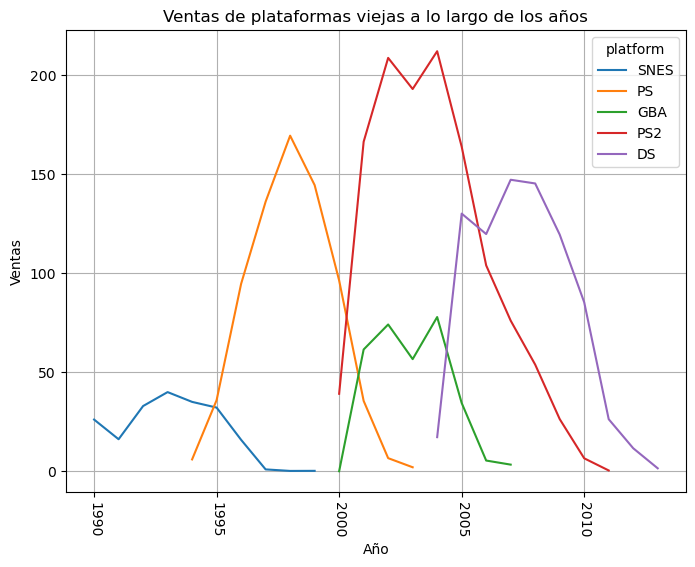

In [35]:
# Graficamos la información
plt.figure(figsize=(8,6))
sns.lineplot(data = old_platform_sales, x='year_of_release', y='total_sales', hue='platform')
plt.title('Ventas de plataformas viejas a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(rotation = 270)
plt.grid(True)

plt.show()

Con la información obtenida podemos concluir en lo siguiente: 

* Las ventas por plataforma tienen una duración promedio de 9 años.
*  Podemos ver comportamientos interesantes, como es el caso de SNES y PS, PS y PS2 y por ultimo GBA y DS. Como teníamos esperado las plataformas viejas tardan en salir del mercado en un promedio de 4.6 años desde el momento que entro una plataforma nueva. 

De acuerdo a estas conclusiones el periodo que se escogerá para los futuros análisis será de 10 años, considerando que en promedio loas plataformas tienen un promedio de duración util en el mercado de 9 años y que al momento de que una plataforma nueva entra en el mercado, las plataformas viejas salen en un promedio de 4.6 años. 

Volveremos a investigar las plataformas con mayores ventas considerando la criteria anterior. Considerando que el propósito de la investigación es para tomar acción sobre las decisiones de marketing del año 2017, buscaremos la información aparir del año 2007.

,platform,total_sales
0,PS3,913.56
1,X360,905.65
2,Wii,763.12
3,DS,537.06
4,PS4,314.14
5,3DS,258.51
6,PSP,186.39
7,PC,163.61
8,PS2,163.44
9,XOne,159.32


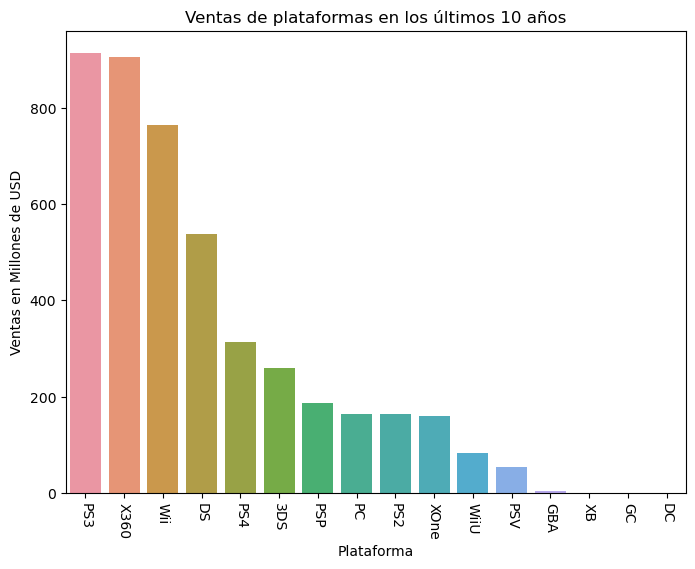

In [36]:
# Filtramos la información a mostrar los resultados de los últimos 10 años de ventas por plataforma
df_games_2007 = df_games[df_games['year_of_release'] >= 2007]

platform_sales_2007 = df_games_2007.groupby('platform')['total_sales'] \
    .sum().sort_values(ascending=False).reset_index()
    
display(platform_sales_2007)

plt.figure(figsize=(8,6))
sns.barplot(data=platform_sales_2007, x='platform', y='total_sales')
plt.title('Ventas de plataformas en los últimos 10 años')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en Millones de USD')
plt.xticks(rotation = 270)

plt.show()

Teniendo esta nueva lista de plataformas, podemos proceder a seleccionar 10 plataformas, para ver su comportamiento.

In [37]:
# Creando la lista de las ultimas 6 plataformas
new_platforms = platform_sales_2007['platform'].head(10)

# Filtramos de acuerdo a la lista "new_platforms"
year_new_platforms = df_games_2007[df_games_2007['platform'].isin(new_platforms)]

# Agrupamos por año y ventas
year_new_platform_sales = year_new_platforms.groupby(['year_of_release', 'platform'])['total_sales'] \
    .sum().sort_index().reset_index()
    
# Mostramos el resultado
display(year_new_platform_sales)



,year_of_release,platform,total_sales
0,2007,DS,147.23
1,2007,PC,9.28
2,2007,PS2,76.10
3,2007,PS3,73.19
4,2007,PSP,47.30
...,...,...,...
71,2016,PS3,3.60
72,2016,PS4,69.25
73,2016,Wii,0.18
74,2016,X360,1.52


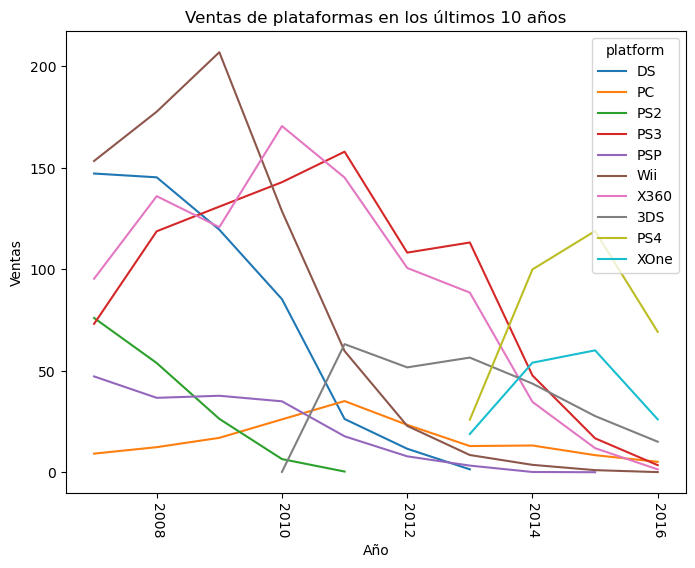

In [38]:
# Graficamos estos resultados
plt.figure(figsize=(8,6))
sns.lineplot(data = year_new_platform_sales, x='year_of_release', y='total_sales', hue='platform')
plt.title('Ventas de plataformas en los últimos 10 años')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(rotation = 270)

plt.show()

Como podemos ver en la gráfica anterior, podemos ver que las plataformas que van de salida son:
* DS
* Wii
* PS2
* PS3
* X360
* PSP

Las plataformas que siguen en el mercado son:
* PC
* 3DS

Y por ultimo las plataformas que van entrando y que potencialmente rentables son
* XOne
* PS4

Conociendo esta información seleccionaremos algunas plataformas para ver su comportamiento en relación a sus ventas totales. Esas plataformas serán:
* PS4
* PS3
* PC
* X360
* 3DS


<Axes: xlabel='platform', ylabel='total_sales'>

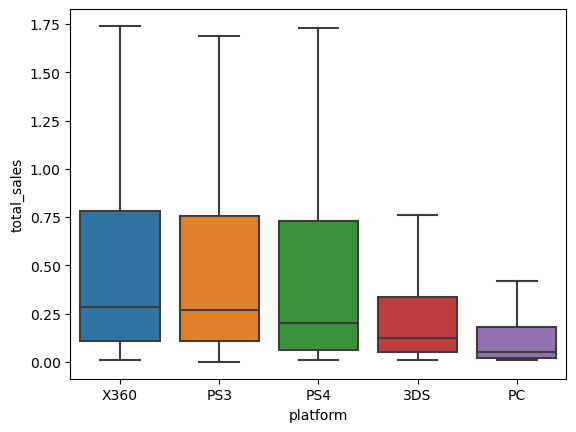

In [39]:
# Creamos una lista con las plataformas seleccionadas
platform_list = ['PS4', 'PS3', 'PC', 'X360', '3DS']

# Filtramos la información con la lista de plataformas
selected_platforms = df_games_2007[df_games_2007['platform'].isin(platform_list)]

# Hacemos un diagrama de cajas y bigotes para analizar el comportamiento de las ventas
sns.boxplot(data = selected_platforms, y = 'total_sales', x = 'platform', showfliers = False)


Como podemos ver en los diagramas, las plataformas "X360", "PS3" y "PS4" tienen mayor venta de títulos en los casos de las plataformas "3DS" y "PC". 

A continuación veremos como afectan las criticas de los profesionales y de los usuarios en las ventas de los títulos en la plataformas "PS4" y "X360".

In [40]:
# Filtramos la información para solo tener resultados cuya plataforma sea "PS4"
ps4_info = df_games_2007[(df_games_2007['platform'] == 'PS4') | (df_games_2007['platform'] == 'X360')]

# Filtramos la información para que no contenga información nula en las columnas "critic_score" y "user_score"
ps4_info = ps4_info[(ps4_info['critic_score'].notna()) & (ps4_info['user_score'].notna())]

# Mostramos la información filtrada
ps4_info.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


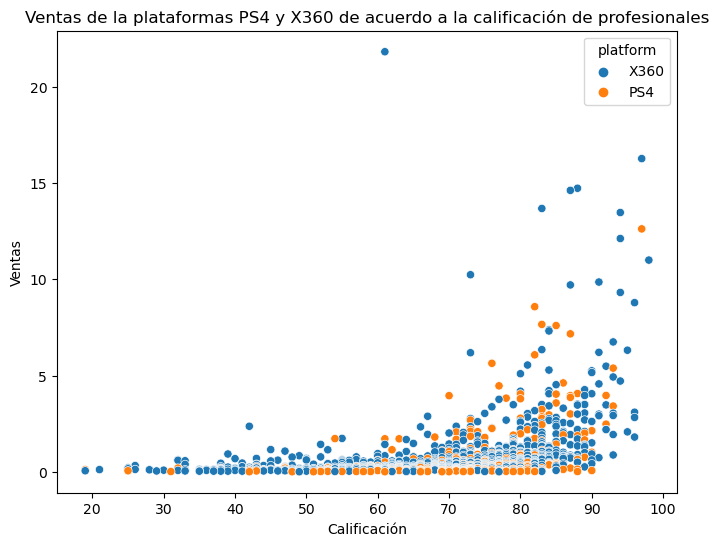

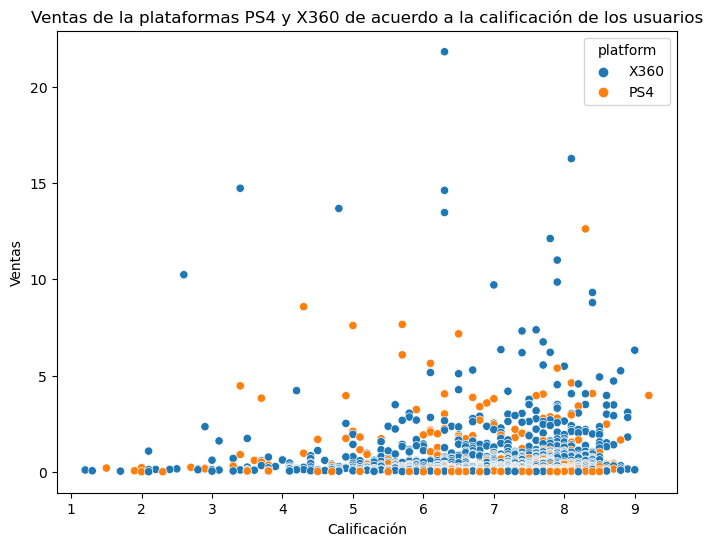

In [41]:
# Creamos un gráfico de dispersión sobre las ventas en cuanto a las criticas de los profesionales
plt.figure(figsize=(8,6))
sns.scatterplot(data = ps4_info, x='critic_score', y='total_sales', hue='platform')
plt.title('Ventas de la plataformas PS4 y X360 de acuerdo a la calificación de profesionales')
plt.xlabel('Calificación')
plt.ylabel('Ventas')

plt.show()

# Creamos un gráfico de dispersión sobre las ventas en cuanto a las criticas de los usuarios
plt.figure(figsize=(8,6))
sns.scatterplot(data = ps4_info, x='user_score', y='total_sales', hue='platform')
plt.title('Ventas de la plataformas PS4 y X360 de acuerdo a la calificación de los usuarios')
plt.xlabel('Calificación')
plt.ylabel('Ventas')

plt.show()

Como podemos ver en los gráficos de dispersión, los títulos con mayores ventas son aquellos que tienen una alta calificación por profesionales, mientras que en la calificación por los usuarios no pareciera tener tanto impacto sin embargo podemos ver que los títulos con calificación mayor a 5 tiende a tener mas ventas.

Para profundizar un poco en el comportamiento de las ventas, veremos a continuación como se desglosan las ventas por genero. 

A continuación veamos las correlaciones entre estas dos variables en cuanto a cada plataforma:

In [55]:
# Correlaciones PS4
critic_correlation_PS4 = ps4_info[ps4_info['platform'] == 'PS4']['critic_score'].corr(ps4_info[ps4_info['platform'] == 'PS4']['total_sales'])
user_correlation_PS4 = ps4_info[ps4_info['platform'] == 'PS4']['user_score'].corr(ps4_info[ps4_info['platform'] == 'PS4']['total_sales'])

# Correlaciones Xbox360
critic_correlation_X360 = ps4_info[ps4_info['platform'] == 'X360']['critic_score'].corr(ps4_info[ps4_info['platform'] == 'X360']['total_sales'])
user_correlation_X360 = ps4_info[ps4_info['platform'] == 'X360']['user_score'].corr(ps4_info[ps4_info['platform'] == 'X360']['total_sales'])

# Imprimimos los resultados
print("La correlación numérica entre la critica de profesionales y las ventas de la plataforma PS4 es: ", critic_correlation_PS4)
print("La correlación numérica entre la critica de usuarios y las ventas de la plataforma PS4 es: ", user_correlation_PS4)

print("La correlación numérica entre la critica de profesionales y las ventas de la plataforma Xbox360 es: ", critic_correlation_X360)
print("La correlación numérica entre la critica de usuarios y las ventas de la plataforma Xbox360 es: ", user_correlation_X360)


La correlación numérica entre la critica de profesionales y las ventas de la plataforma PS4 es:  0.40589480145836687
La correlación numérica entre la critica de usuarios y las ventas de la plataforma PS4 es:  -0.03362497596528878
La correlación numérica entre la critica de profesionales y las ventas de la plataforma Xbox360 es:  0.3917344677420263
La correlación numérica entre la critica de usuarios y las ventas de la plataforma Xbox360 es:  0.10735024694276697


Como podemos ver en estos resultados, notamos que la correlación numérica con respecto a la critica de los profesionales y las ventas totales es positiva lo cual muestra que hay un impacto en cuanto a la critica de los profesionales con las ventas totales del titulo. Mientras tanto vemos que la critica de los usuarios no impactan tanto las ventas de los títulos pues la correlación numérica es menor a la de la correlación con la critica de los profesionales.

In [42]:
# Agrupamos por genero
genre_sales = df_games_2007.groupby('genre')['total_sales'] \
    .sum().sort_values(ascending=False).reset_index()

# Mostramos los resultados
genre_sales


,genre,total_sales
0,Action,1066.14
1,Shooter,681.78
2,Sports,660.77
3,Misc,490.57
4,Role-Playing,465.08
5,Racing,265.32
6,Platform,230.45
7,Simulation,199.46
8,Fighting,166.23
9,Adventure,130.01


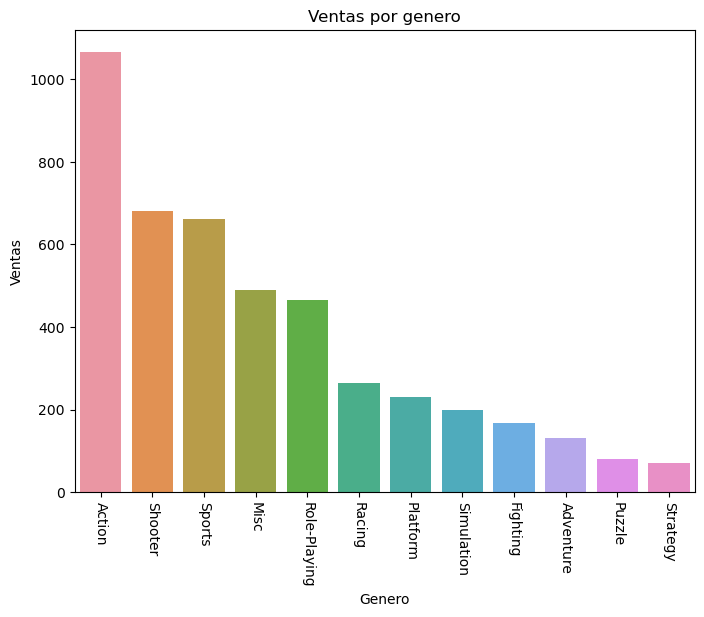

In [43]:
# Mostramos los resultados en una gráfica
plt.figure(figsize=(8,6))
sns.barplot(data = genre_sales, x = 'genre', y = 'total_sales')
plt.title('Ventas por genero')
plt.xlabel('Genero')
plt.ylabel('Ventas')
plt.xticks(rotation = 270)

plt.show()

Como podemos ver, notamos una gran inclinación del publico por los títulos del genero "Action" (Acción).

___

## <a id='toc1_7_'></a>[Paso 4: Perfil de usuario para cada región](#toc0_)

Para cada región del dataset se realizaran las siguientes investigaciones: 

* Las cinco plataformas principales.
* Los cinco géneros principales.
* Si las clasificaciones de ESRB afectan las ventas regionales.



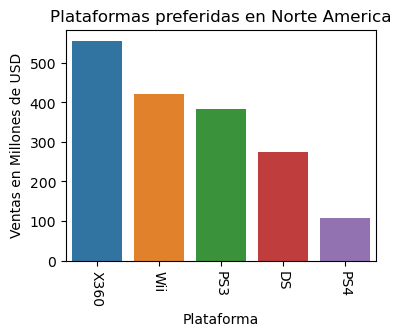

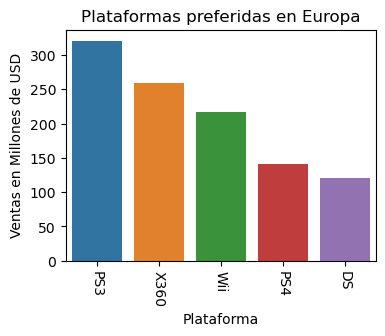

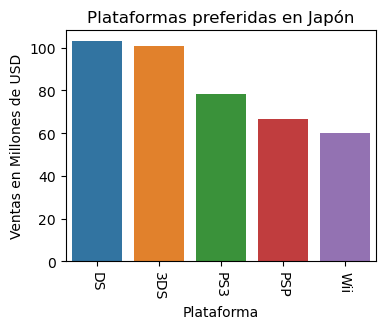

In [44]:
# Agrupamos la información por region

# Ventas en Norte America
na_sales = df_games_2007.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
# Ventas en Europa
eu_sales = df_games_2007.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
# Ventas en Japón
jp_sales = df_games_2007.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()

# Graficamos las 5 plataformas lideres en ventas de cada region.

# Norte America
plt.figure(figsize=(4,3))
sns.barplot(data=na_sales.head(5), x='platform', y='na_sales')
plt.title('Plataformas preferidas en Norte America')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en Millones de USD')
plt.xticks(rotation = 270)

plt.show()

# Europa
plt.figure(figsize=(4,3))
sns.barplot(data=eu_sales.head(5), x='platform', y='eu_sales')
plt.title('Plataformas preferidas en Europa')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en Millones de USD')
plt.xticks(rotation = 270)

plt.show()

# Japón
plt.figure(figsize=(4,3))
sns.barplot(data=jp_sales.head(5), x='platform', y='jp_sales')
plt.title('Plataformas preferidas en Japón')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en Millones de USD')
plt.xticks(rotation = 270)

plt.show()


Como podemos ver, en Norte America se prefiere "X360", en Europa "PS3" y en Japón "DS". Ahora busquemos los géneros preferentes en cada region.

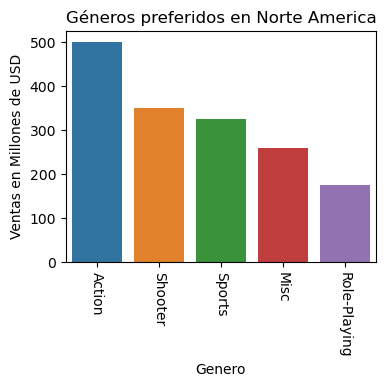

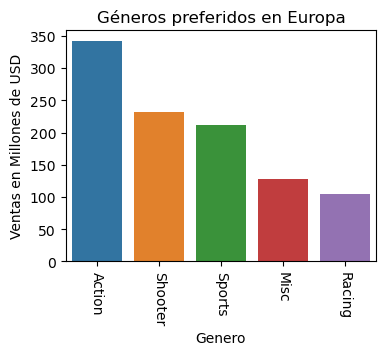

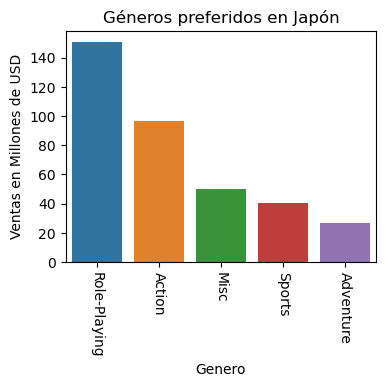

In [45]:
# Agrupamos la información por region

# Ventas en Norte America
na_sales_genre = df_games_2007.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
# Ventas en Europa
eu_sales_genre = df_games_2007.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
# Ventas en Japón
jp_sales_genre = df_games_2007.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()

# Graficamos las 5 plataformas lideres en ventas de cada region.

# Norte America
plt.figure(figsize=(4,3))
sns.barplot(data=na_sales_genre.head(5), x='genre', y='na_sales')
plt.title('Géneros preferidos en Norte America')
plt.xlabel('Genero')
plt.ylabel('Ventas en Millones de USD')
plt.xticks(rotation = 270)

plt.show()

# Europa
plt.figure(figsize=(4,3))
sns.barplot(data=eu_sales_genre.head(5), x='genre', y='eu_sales')
plt.title('Géneros preferidos en Europa')
plt.xlabel('Genero')
plt.ylabel('Ventas en Millones de USD')
plt.xticks(rotation = 270)

plt.show()

# Japón
plt.figure(figsize=(4,3))
sns.barplot(data=jp_sales_genre.head(5), x='genre', y='jp_sales')
plt.title('Géneros preferidos en Japón')
plt.xlabel('Genero')
plt.ylabel('Ventas en Millones de USD')
plt.xticks(rotation = 270)

plt.show()

En America del Norte al igual que en Europa prefieren casi los mismos géneros predominando el genero de "Action"(Acción) mientras que en Japón, el genero que predomina es "Role-Playing"(Juegos de Rol).

A continuación veamos como las clasificaciones afectan las ventas en cada region.

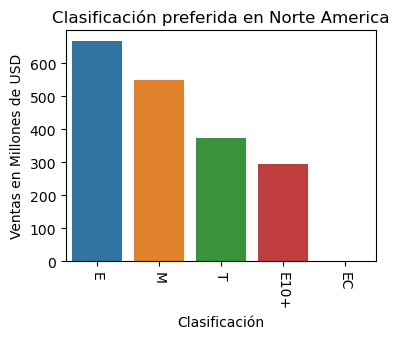

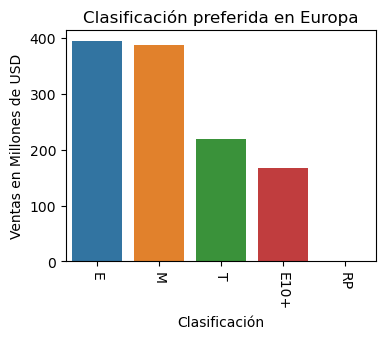

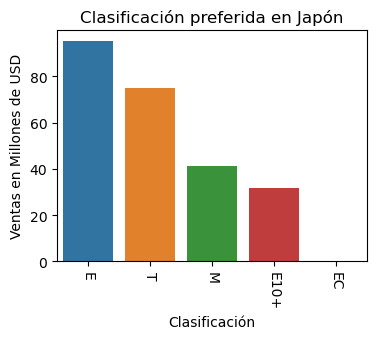

In [46]:
# Filtramos la información para omitir las filas con el contenido "Unknown" de la columna "rating"
df_games_2007_rating_filter = df_games_2007[df_games_2007['rating'] != 'Unknown']

# Agrupamos la información por region

# Ventas en Norte America
na_sales_rating = df_games_2007_rating_filter.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
# Ventas en Europa
eu_sales_rating = df_games_2007_rating_filter.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
# Ventas en Japón
jp_sales_rating = df_games_2007_rating_filter.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()

# Graficamos las 5 plataformas lideres en ventas de cada region.

# Norte America
plt.figure(figsize=(4,3))
sns.barplot(data=na_sales_rating.head(5), x='rating', y='na_sales')
plt.title('Clasificación preferida en Norte America')
plt.xlabel('Clasificación')
plt.ylabel('Ventas en Millones de USD')
plt.xticks(rotation = 270)

plt.show()

# Europa
plt.figure(figsize=(4,3))
sns.barplot(data=eu_sales_rating.head(5), x='rating', y='eu_sales')
plt.title('Clasificación preferida en Europa')
plt.xlabel('Clasificación')
plt.ylabel('Ventas en Millones de USD')
plt.xticks(rotation = 270)

plt.show()

# Japón
plt.figure(figsize=(4,3))
sns.barplot(data=jp_sales_rating.head(5), x='rating', y='jp_sales')
plt.title('Clasificación preferida en Japón')
plt.xlabel('Clasificación')
plt.ylabel('Ventas en Millones de USD')
plt.xticks(rotation = 270)

plt.show()

La clasificación preferida por los usuarios en cada región es "E".

___

## <a id='toc1_8_'></a>[Paso 5: Prueba de hipótesis](#toc0_)

Por ultimo, se probarán las siguientes hipótesis:

* Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
    * De lo contrario las calificaciones promedio son distintas.
* Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
    * De lo contrario las calificaciones promedio son distintas.

Como en ambas hipótesis se van a comparar dos categorías con respecto a una variable numérica la cual es la calificación por los usuarios (`user_score`) en donde se desconocen sus desviaciones estándar, se propone hacer un t-test. 

Para hacer las pruebas estableceremos un umbral de probabilidad de 5% (0.05):

### <a id='toc1_8_1_'></a>[Primera Hipótesis](#toc0_)

H0 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

H1 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [47]:
# Filtramos la información por plataforma y nos deshacemos de los datos nulos
score_XOne = df_games[df_games['platform'] == 'XOne']['user_score'].dropna()
score_PC = df_games[df_games['platform'] == 'PC']['user_score'].dropna()

In [48]:
# Establecemos el valor de alpha
alpha = 0.05

# Hacemos el test:
results = st.ttest_ind(score_XOne, score_PC)

# Mostramos los promedios:
print('La calificación promedio de los usuarios de la plataforma XOne es', score_XOne.mean())
print()
print('La calificación promedio de los usuarios de la plataforma PC es', score_PC.mean())

# Mostramos el valor p
print()
print('El Valor P: ', results.pvalue)

# Comparamos el valor p con el umbral seleccionado
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print('No podemos rechazar la hipótesis nula')

La calificación promedio de los usuarios de la plataforma XOne es 6.521428571428572

La calificación promedio de los usuarios de la plataforma PC es 7.067362924281984

El Valor P:  1.148800280720069e-05
Rechazamos la hipótesis nula


Como podemos ver en los resultados, notamos que la calificación promedio de la plataforma XOne y PC, no son las mismas, sin embargo no hay mucha diferencia. 

### <a id='toc1_8_2_'></a>[Segunda Hipótesis](#toc0_)

H0 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

H1 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales. 


In [51]:
# Filtramos la información por genero y nos deshacemos de los datos nulos
score_action = df_games[df_games['genre'] == 'Action']['user_score']
score_sports = df_games[df_games['genre'] == 'Sports']['user_score']

In [52]:
# Establecemos el valor de alpha
alpha = 0.05

# Hacemos el test:
results = st.ttest_ind(score_action, score_sports, nan_policy='omit')

# Mostramos los promedios:
print('La calificación promedio de los usuarios de la plataforma XOne es', score_action.mean())
print()
print('La calificación promedio de los usuarios de la plataforma PC es', score_sports.mean())

# Mostramos el valor p
print()
print('El Valor P: ', results.pvalue)

# Comparamos el valor p con el umbral seleccionado
if results.pvalue < alpha:
    print("No podemos rechazar la hipótesis nula")
else:
    print('Rechazamos la hipótesis nula')

La calificación promedio de los usuarios de la plataforma XOne es 7.0564835164835165

La calificación promedio de los usuarios de la plataforma PC es 6.960873521383076

El Valor P:  0.09474836282757328
Rechazamos la hipótesis nula


Como podemos ver en los resultados, las calificaciones de los géneros Acción y Deportes son casi iguales presentando una probabilidad de obtener aleatoriamente una diferencia de un 9%. 

___

## <a id='toc1_9_'></a>[Paso 6: Conclusiones generales](#toc0_)

De acuerdo a los resultados obtenidos a lo largo de este análisis, podemos concluir en lo siguiente:

1. El promedio de vida de ventas por plataforma es de un 9 años y tardan en desaparecer al rededor de 4.6 años después de que una nueva plataforma aparece.

2. Dentro del análisis vimos 2 plataformas potencialmente en crecimiento las cuales son "PS4" y "XOne", ademas podemos ver que la plataforma "3DS" será la proxima plataforma a salir del mercado.

3. Las criticas de los profesionales influye mucho en cuanto a la venta de los juegos, si la calificación del titulo es mayor a 70 es mas probable que alcance mas ventas.

4. Los géneros mas vendido en America del Norte y Europa son de Acción, Shooter y de Deportes, mientras que en Japón predominan mas los juegos de Rol por encima de la Acción, sin embargo podríamos concluir que el genero mas vendido es Acción.
